<a href="https://colab.research.google.com/github/Hansulich/park/blob/main/sample_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

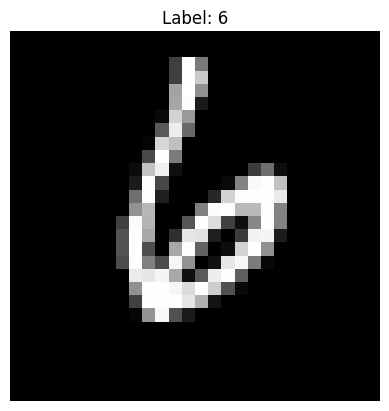

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.9183
Correctly predicted images:


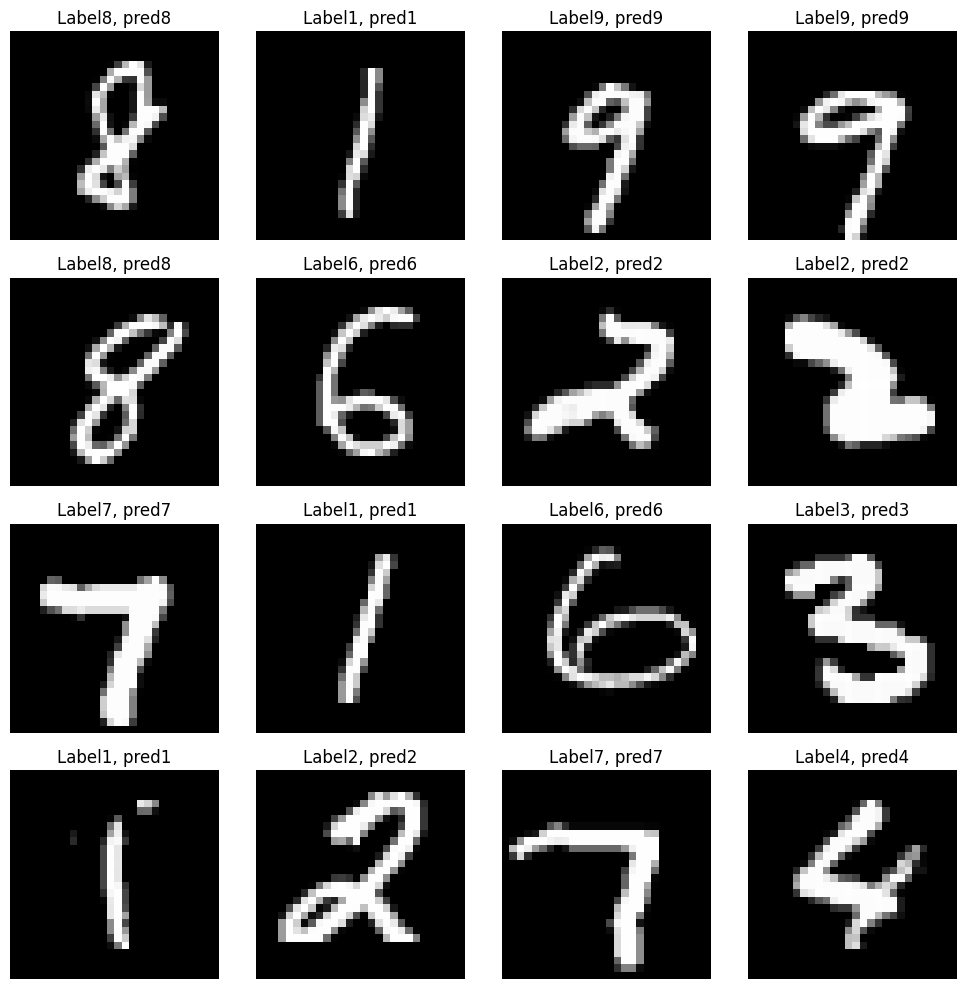

Incorrectly predicted images:


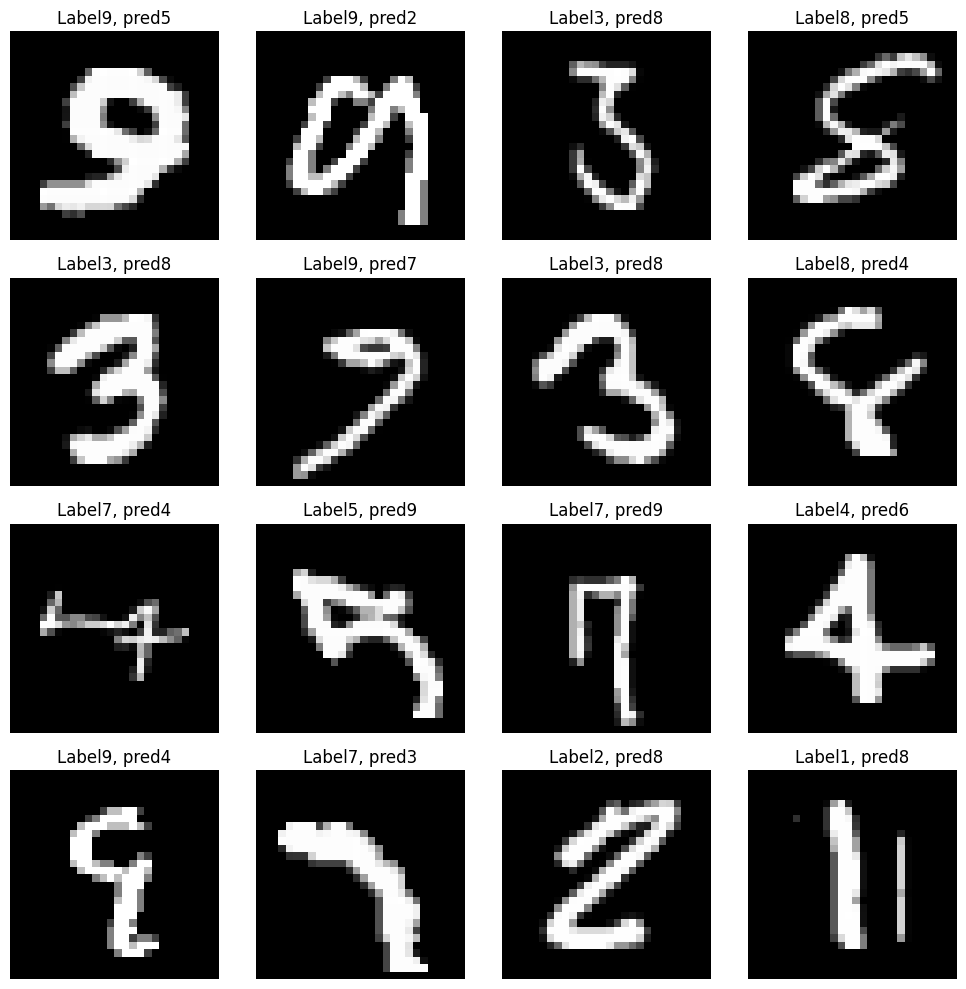

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# 1. sample_submission을 다운하기 위해 files import
from google.colab import files

# 2. 데이터 로드
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# 3. 데이터 분할
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 이미지 샘플 시각화
def plot_sample(X, y, index):
    image = X[index].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y[index]}")
    plt.axis('off')
    plt.show()

plot_sample(X_train, y_train, 0)

# 5. 모델 학습
# clf = RandomForestClassifier(n_estimators=100, random_state=42) 로 학습해도 됨
clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                          intercept_scaling=1, l1_ratio=None, max_iter=100,
                          multi_class='multinomial', n_jobs=None, penalty='l2',
                          random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                          warm_start=False)
clf.fit(X_train, y_train)

# 6. 검증 데이터로 예측 및 정확도 평가
y_val_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# 7. 올바르게 분류한 이미지 시각화
x_val_correct = X_val[y_val == y_val_pred]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

print("Correctly predicted images:")
plt.figure(figsize=(10, 10))
for i in range(16):  # 16개 출력
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_val_correct[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label{y_val_correct[i]}, pred{y_val_pred_correct[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 8. 잘못 분류한 이미지 시각화
x_val_incorrect = X_val[y_val != y_val_pred]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

print("Incorrectly predicted images:")
plt.figure(figsize=(10, 10))
for i in range(16):  # 16개 출력
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_val_incorrect[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label{y_val_incorrect[i]}, pred{y_val_pred_incorrect[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 9. 테스트 데이터 예측
X_test = test_df.values
y_test_pred = clf.predict(X_test)

# 10. sample_submission.csv 저장
submission = pd.DataFrame({'ImageId': np.arange(1, len(y_test_pred)+1), 'Label': y_test_pred})
submission.to_csv('sample_submission.csv', index=False)
files.download('sample_submission.csv')